<a href="https://colab.research.google.com/github/SSAFY11-Data-ML-Study/20240417_Tangerine_Data/blob/main/20240417_%EA%B9%80%EB%AF%BC%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data: https://dacon.io/competitions/official/236176/overview/description

목차   
0. 데이터     
1. 모델      
    1.1 Catboost    
    1.2 LightGBM    
2. 제출     
3. 딥러닝 기반 모델(작업중)    

# 0. Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd

In [1]:
import numpy as np

In [95]:
train = pd.read_csv("/content/drive/MyDrive/data_0417/train.csv")
int_trade = pd.read_csv("/content/drive/MyDrive/data_0417/international_trade.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0417/test.csv")

In [ ]:
train.isnull().sum()

In [ ]:
int_trade.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
train.keys()

In [ ]:
int_trade.keys()

In [ ]:
test.keys()

In [ ]:
train.head(10)

In [ ]:
int_trade.head(20)

In [ ]:
train.size

In [ ]:
int_trade.size

In [44]:
from sklearn.preprocessing import LabelEncoder

In [96]:
train = pd.read_csv("/content/drive/MyDrive/data_0417/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0417/test.csv")
def preprocess(data):
    data.drop("ID",axis = 1,inplace = True)
    data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')
    data['year'] = data['timestamp'].dt.year
    data['month'] = data['timestamp'].dt.month
    data['day'] = data['timestamp'].dt.day
    data['day_of_week'] = data['timestamp'].dt.dayofweek
    data['holiday'] = data.apply(lambda x:0 if x['day_of_week']<5 else 1,axis = 1)
    data.drop(columns=["timestamp"],axis=1,inplace=True)
    data.rename(columns={'supply(kg)':'supply', 'price(원/kg)':'price'},inplace=True)
    if 'supply' in data.keys():
        data.drop(columns=["supply"],axis=1,inplace=True)
    for i in ['item','corporation','location']:
        le = LabelEncoder()
        le = le.fit(data[i])
        data[i] = le.transform(data[i])
    return data
preprocess(train)
preprocess(test)

,item,corporation,location,year,month,day,day_of_week,holiday
0,4,0,0,2023,3,4,5,1
1,4,0,0,2023,3,5,6,1
2,4,0,0,2023,3,6,0,0
3,4,0,0,2023,3,7,1,0
4,4,0,0,2023,3,8,2,0
...,...,...,...,...,...,...,...,...
1087,3,5,0,2023,3,27,0,0
1088,3,5,0,2023,3,28,1,0
1089,3,5,0,2023,3,29,2,0
1090,3,5,0,2023,3,30,3,0


In [97]:
train

,item,corporation,location,price,year,month,day,day_of_week,holiday
0,4,0,0,0.0,2019,1,1,1,0
1,4,0,0,0.0,2019,1,2,2,0
2,4,0,0,1728.0,2019,1,3,3,0
3,4,0,0,1408.0,2019,1,4,4,0
4,4,0,0,1250.0,2019,1,5,5,1
...,...,...,...,...,...,...,...,...,...
59392,3,5,0,468.0,2023,2,27,0,0
59393,3,5,0,531.0,2023,2,28,1,0
59394,3,5,0,574.0,2023,3,1,2,0
59395,3,5,0,523.0,2023,3,2,3,0


In [ ]:
test

,item,corporation,location,year,month,day,day_of_week,holiday
0,4,0,0,2023,3,4,5,1
1,4,0,0,2023,3,5,6,1
2,4,0,0,2023,3,6,0,0
3,4,0,0,2023,3,7,1,0
4,4,0,0,2023,3,8,2,0
...,...,...,...,...,...,...,...,...
1087,3,5,0,2023,3,27,0,0
1088,3,5,0,2023,3,28,1,0
1089,3,5,0,2023,3,29,2,0
1090,3,5,0,2023,3,30,3,0


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
def split(train):
    target = train['price']
    train = train.drop('price',axis = 1)
    x_train, x_valid, y_train, y_valid = train_test_split(train,target,test_size = 0.2)
    return x_train, x_valid, y_train, y_valid
# x_train, x_valid, y_train, y_valid = split(train)

## 라벨 별 분할

In [ ]:
train['item'].value_counts()

item
4    15230
0    13707
3    12184
2    10661
1     7615
Name: count, dtype: int64

In [ ]:
test['item'].value_counts()

item
4    280
0    252
3    224
2    196
1    140
Name: count, dtype: int64

In [98]:
train0=train[train['item']==0].reset_index(drop=True)
train1=train[train['item']==1].reset_index(drop=True)
train2=train[train['item']==2].reset_index(drop=True)
train3=train[train['item']==3].reset_index(drop=True)
train4=train[train['item']==4].reset_index(drop=True)

In [99]:
train0.drop('item',axis=1,inplace=True)
train1.drop('item',axis=1,inplace=True)
train2.drop('item',axis=1,inplace=True)
train3.drop('item',axis=1,inplace=True)
train4.drop('item',axis=1,inplace=True)

In [50]:
x_train0,x_valid0,y_train0,y_valid0 = split(train0)
x_train1,x_valid1,y_train1,y_valid1 = split(train1)
x_train2,x_valid2,y_train2,y_valid2 = split(train2)
x_train3,x_valid3,y_train3,y_valid3 = split(train3)
x_train4,x_valid4,y_train4,y_valid4 = split(train4)

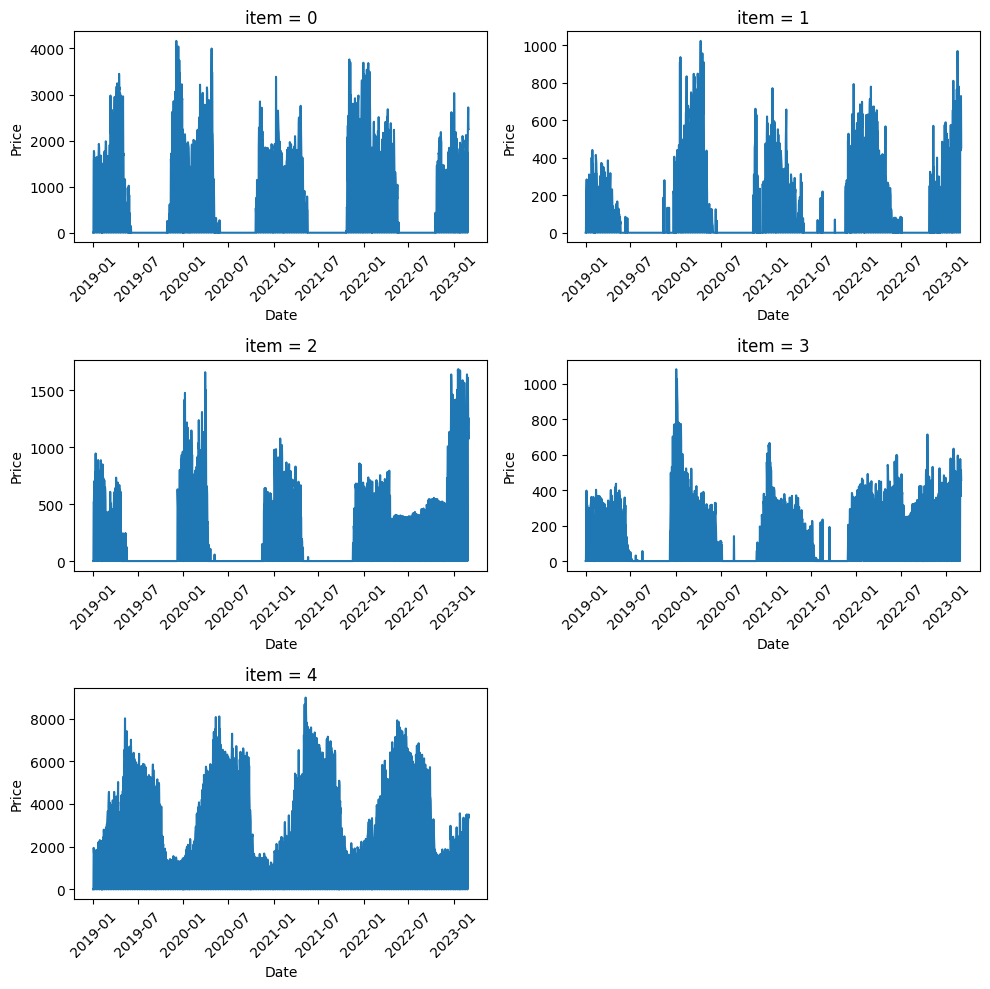

In [79]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

gs = GridSpec(3,2)
fig = plt.figure(figsize=(10,10))
df_list = [train0,train1,train2,train3,train4]
for i in range(5):
    df = df_list[i]
    df['date'] = pd.to_datetime(df[['year', 'month','day']])
    grouped = df.groupby('date')['price'].mean().reset_index()
    ax = fig.add_subplot(gs[i])
    ax.plot(grouped['date'], grouped['price'],"-")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f'item = {i}')
    ax.tick_params(axis='x',rotation=45)
plt.tight_layout()

# 1. Model

## 1.1 Catboost

In [162]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.1 MB/s eta 0:00:00


In [163]:
from catboost import CatBoostRegressor,Pool

In [ ]:
train_pool = Pool(data=x_train,label=y_train)
valid_pool = Pool(data=x_valid,label=y_valid)

In [ ]:
cat = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat.fit(train_pool,eval_set=(valid_pool),verbose = 100)

In [ ]:
test_pool = Pool(data = test)
test_pred = cat.predict(test_pool)

In [ ]:
for i in range(len(test_pred)):
    if test_pred[i]<0:
        test_pred[i] = 0

In [ ]:
train_pool0 = Pool(data=x_train0,label=y_train0)
valid_pool0 = Pool(data=x_valid0,label=y_valid0)
train_pool1 = Pool(data=x_train1,label=y_train1)
valid_pool1 = Pool(data=x_valid1,label=y_valid1)
train_pool2 = Pool(data=x_train2,label=y_train2)
valid_pool2 = Pool(data=x_valid2,label=y_valid2)
train_pool3 = Pool(data=x_train3,label=y_train3)
valid_pool3 = Pool(data=x_valid3,label=y_valid3)
train_pool4 = Pool(data=x_train4,label=y_train4)
valid_pool4 = Pool(data=x_valid4,label=y_valid4)

In [ ]:
cat0 = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat0.fit(train_pool0,eval_set=(valid_pool0),verbose = 100)
cat1 = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat1.fit(train_pool1,eval_set=(valid_pool1),verbose = 100)
cat2 = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat2.fit(train_pool2,eval_set=(valid_pool2),verbose = 100)
cat3 = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat3.fit(train_pool3,eval_set=(valid_pool3),verbose = 100)
cat4 = CatBoostRegressor(iterations=2000, learning_rate = 0.1, random_strength = 0.5, depth = 7, random_state = 42)
cat4.fit(train_pool4,eval_set=(valid_pool4),verbose = 100)

In [ ]:
test_pool = Pool(data = test)
# test_pred = cat.predict(test_pool)

In [ ]:
test_pred = []
for i in range(len(test)):
    if test.iloc[i]['item'] == 0:
        data_point = test.iloc[i].drop('item')
        test_pred.append(float(cat0.predict(data_point.values.reshape(1, -1))))
    elif test.iloc[i]['item'] == 1:
        data_point = test.iloc[i].drop('item')
        test_pred.append(float(cat1.predict(data_point.values.reshape(1, -1))))
    elif test.iloc[i]['item'] == 2:
        data_point = test.iloc[i].drop('item')
        test_pred.append(float(cat2.predict(data_point.values.reshape(1, -1))))
    elif test.iloc[i]['item'] == 3:
        data_point = test.iloc[i].drop('item')
        test_pred.append(float(cat3.predict(data_point.values.reshape(1, -1))))
    elif test.iloc[i]['item'] == 4:
        data_point = test.iloc[i].drop('item')
        test_pred.append(float(cat4.predict(data_point.values.reshape(1, -1))))

In [ ]:
len(test_pred)

In [ ]:
for i in range(len(test)):
    if test.iloc[i]['item'] == 1:
        data_point = test.iloc[i].drop('item')
        test_pred = cat0.predict(data_point.values.reshape(1, -1))


In [ ]:
test

## 1.2 LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
train_lgb = lgb.Dataset(x_train,label = y_train)
test_lgb= lgb.Dataset(x_valid, label=y_valid)

params = {
    'objective' : 'regression',
    'metric': 'rmse',
    'num_leaves':30,
    'lr':0.1,
    'feature_fraction':0.9
}

model = lgb.train(params,train_lgb,num_boost_round=100)

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 47517, number of used features: 8
[LightGBM] [Info] Start training from score 1119.328240


In [ ]:
test_pred = model.predict(test)

In [ ]:
for i in range(len(test_pred)):
    if test_pred[i]<0:
        test_pred[i] = 0

# 2. Submit

In [ ]:
submit = pd.read_csv("/content/drive/MyDrive/data_0417/sample_submission.csv")
submit['answer'] = test_pred
submit.to_csv("/content/drive/MyDrive/data_0417/trial3_1.csv",index=False)


In [ ]:
submit

,ID,answer
0,TG_A_J_20230304,3627.043926
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,2998.233176
3,TG_A_J_20230307,3585.484612
4,TG_A_J_20230308,3898.885342
...,...,...
1087,RD_F_J_20230327,538.482200
1088,RD_F_J_20230328,568.699651
1089,RD_F_J_20230329,508.799812
1090,RD_F_J_20230330,473.925352


In [ ]:
train.value_counts('corporation')

corporation
0    13707
4    13707
3    12184
2     9138
1     7615
5     3046
dtype: int64

In [ ]:
test.value_counts('corporation')

corporation
0    252
4    252
3    224
2    168
1    140
5     56
dtype: int64

In [ ]:
test

,item,corporation,location,year,month,day,day_of_week,holiday
0,4,0,0,2023,3,4,5,1
1,4,0,0,2023,3,5,6,1
2,4,0,0,2023,3,6,0,0
3,4,0,0,2023,3,7,1,0
4,4,0,0,2023,3,8,2,0
...,...,...,...,...,...,...,...,...
1087,3,5,0,2023,3,27,0,0
1088,3,5,0,2023,3,28,1,0
1089,3,5,0,2023,3,29,2,0
1090,3,5,0,2023,3,30,3,0


# 3. 딥러닝 모델 (LSTM)

In [19]:
##작업중(LSTM)

In [20]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [21]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#LSTM용 데이터 준비

In [126]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        sequences.append((seq[:-1], seq[-1]))
    return sequences

In [159]:
def to_tensor(data):
    X, y = zip(*data)
    print((X,y))
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

In [128]:
seq_length = 10

In [129]:
def dataToLSTM(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    sequences = create_sequences(scaled_data, seq_length)
    split = int(0.8 * len(sequences))
    train_data = sequences[:split]
    test_data = sequences[split:]
    train_X, train_y = to_tensor(train_data)
    test_X, test_y = to_tensor(test_data)
    return train_X, train_y, test_X, test_y

In [130]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [131]:
# 하이퍼파라미터 설정
input_size = 8
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

In [132]:
df = [train0, train1, train2, train3, train4]

In [133]:
model0 = LSTMModel(input_size, hidden_size, num_layers, output_size)
model1 = LSTMModel(input_size, hidden_size, num_layers, output_size)
model2 = LSTMModel(input_size, hidden_size, num_layers, output_size)
model3 = LSTMModel(input_size, hidden_size, num_layers, output_size)
model4 = LSTMModel(input_size, hidden_size, num_layers, output_size)

In [134]:
model = [model0,model1,model2,model3,model4]

In [ ]:
for i in range(5):
    train_X, train_y, test_X, test_y = dataToLSTM(df[i])
    # 손실 함수와 최적화 함수 설정
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model[i].parameters(), lr=learning_rate)
    # 모델 학습
    for epoch in range(num_epochs):
        model[i].train()
        optimizer.zero_grad()
        outputs = model[i](train_X)
        loss = criterion(outputs, train_y)
        loss.backward()
        optimizer.step()
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    #모델 평가
    model[i].eval()
    with torch.no_grad():
        test_outputs = model[i](test_X)
        test_loss = criterion(test_outputs, test_y)
        print(f'Test Loss: {test_loss.item():.4f}')

In [137]:
test

,item,corporation,location,year,month,day,day_of_week,holiday
0,4,0,0,2023,3,4,5,1
1,4,0,0,2023,3,5,6,1
2,4,0,0,2023,3,6,0,0
3,4,0,0,2023,3,7,1,0
4,4,0,0,2023,3,8,2,0
...,...,...,...,...,...,...,...,...
1087,3,5,0,2023,3,27,0,0
1088,3,5,0,2023,3,28,1,0
1089,3,5,0,2023,3,29,2,0
1090,3,5,0,2023,3,30,3,0


In [161]:
def predict_price(model, test_data):
    result = []
    for i in range(len(test_data)):
        # 모델의 입력에 맞게 테스트 데이터를 준비합니다.
        item = test_data.iloc[i]['item']
        model[item].eval()
        data_tensor = torch.tensor(test_data.iloc[i][['corporation', 'location', 'year', 'month', 'day', 'day_of_week', 'holiday']], dtype=torch.float32)
        with torch.no_grad():
            # 모델을 통해 예측을 수행합니다.
            output = model[item](data_tensor.unsqueeze(0).unsqueeze(0))  # 배치 차원을 추가하여 모델에 입력합니다.
            result.append(output.item())  # 예측값을 결과 리스트에 추가합니다.
    return result

# predict_price 함수를 사용하여 테스트 데이터에 대한 price 예측을 수행합니다.
predicted_prices = predict_price(model, test)


ValueError: LSTM: Expected input to be 2D or 3D, got 4D instead

In [146]:
train0

,corporation,location,price,year,month,day,day_of_week,holiday
0,0,0,0.0,2019,1,1,1,0
1,0,0,0.0,2019,1,2,2,0
2,0,0,2559.0,2019,1,3,3,0
3,0,0,2425.0,2019,1,4,4,0
4,0,0,2097.0,2019,1,5,5,1
...,...,...,...,...,...,...,...,...
13702,4,1,2488.0,2023,2,27,0,0
13703,4,1,3232.0,2023,2,28,1,0
13704,4,1,3816.0,2023,3,1,2,0
13705,4,1,3321.0,2023,3,2,3,0


In [153]:
test_pred = predict(model, test)

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [155]:
test

,item,corporation,location,year,month,day,day_of_week,holiday
0,4,0,0,2023,3,4,5,1
1,4,0,0,2023,3,5,6,1
2,4,0,0,2023,3,6,0,0
3,4,0,0,2023,3,7,1,0
4,4,0,0,2023,3,8,2,0
...,...,...,...,...,...,...,...,...
1087,3,5,0,2023,3,27,0,0
1088,3,5,0,2023,3,28,1,0
1089,3,5,0,2023,3,29,2,0
1090,3,5,0,2023,3,30,3,0
